In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv', index_col=[0])


print('Dimension of dataset: ', data.shape)


print('Attributes in the dataset: ', data.columns.values)


data.head()

Dimension of dataset:  (273, 19)
Attributes in the dataset:  ['Gender' 'Age' 'Schooling' 'Breastfeeding' 'Varicella' 'Initial_Symptom'
 'Mono_or_Polysymptomatic' 'Oligoclonal_Bands' 'LLSSEP' 'ULSSEP' 'VEP'
 'BAEP' 'Periventricular_MRI' 'Cortical_MRI' 'Infratentorial_MRI'
 'Spinal_Cord_MRI' 'Initial_EDSS' 'Final_EDSS' 'group']


,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [3]:

for num, col in zip(range(len(data.columns)), data.columns):
    print(num+1, col, '|', 'Unique value:', data[col].unique())

1 Gender | Unique value: [1 2]
2 Age | Unique value: [34 61 22 41 29 53 24 36 28 60 25 51 32 30 50 38 19 27 23 37 65 39 21 49
 35 42 33 31 40 48 59 46 16 43 47 45 55 56 15 20 44 54 52 70 26 17 18 77]
3 Schooling | Unique value: [20. 25. 15. 22. 12.  0.  9. 14. 23.  6. nan 24.  8.]
4 Breastfeeding | Unique value: [1 3 2]
5 Varicella | Unique value: [1 2 3]
6 Initial_Symptom | Unique value: [ 2. 10.  3.  7.  6. 14.  8. 15.  5. 11. 13.  1. 12.  4.  9. nan]
7 Mono_or_Polysymptomatic | Unique value: [1 2 3]
8 Oligoclonal_Bands | Unique value: [0 1 2]
9 LLSSEP | Unique value: [1 0]
10 ULSSEP | Unique value: [1 0]
11 VEP | Unique value: [0 1]
12 BAEP | Unique value: [0 1]
13 Periventricular_MRI | Unique value: [0 1]
14 Cortical_MRI | Unique value: [1 0]
15 Infratentorial_MRI | Unique value: [0 1]
16 Spinal_Cord_MRI | Unique value: [1 0]
17 Initial_EDSS | Unique value: [ 1.  2.  3. nan]
18 Final_EDSS | Unique value: [ 1.  2.  3. nan]
19 group | Unique value: [1 2]


In [4]:
import numpy as np


replacement_dict = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Breastfeeding': {1: 'Yes', 2: 'No', 3: np.nan},
    'Varicella': {1: 'Positive', 2: 'Negative', 3: np.nan},
    'Mono_or_Polysymptomatic': {1: 'Monosymptomatic', 2: 'Polysymptomatic', 3: np.nan},
    'Oligoclonal_Bands': {0: 'Negative', 1: 'Positive', 2: np.nan},
    'LLSSEP': {0: 'Negative', 1: 'Positive'},
    'ULSSEP': {0: 'Negative', 1: 'Positive'},
    'VEP': {0: 'Negative', 1: 'Positive'},
    'BAEP': {0: 'Negative', 1: 'Positive'},
    'Periventricular_MRI': {0: 'Negative', 1: 'Positive'},
    'Cortical_MRI': {0: 'Negative', 1: 'Positive'},
    'Infratentorial_MRI': {0: 'Negative', 1: 'Positive'},
    'Spinal_Cord_MRI': {0: 'Negative', 1: 'Positive'},
    'Initial_Symptom': {
        1: 'visual', 2: 'sensory', 3: 'motor', 4: 'other', 5: 'visual and sensory', 
        6: 'visual and motor', 7: 'visual and others', 8: 'sensory and motor', 
        9: 'sensory and other', 10: 'motor and other', 11: 'Visual, sensory and motor', 
        12: 'visual, sensory and other', 13: 'Visual, motor and other', 
        14: 'Sensory, motor and other', 15: 'visual,sensory,motor and other'
    },
    'group': {1: 'CDMS', 2: 'Non-CDMS'}
}


for column, mapping in replacement_dict.items():
    if column in data.columns:  
        data[column] = data[column].replace(mapping)



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    object 
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            188 non-null    object 
 4   Varicella                228 non-null    object 
 5   Initial_Symptom          272 non-null    object 
 6   Mono_or_Polysymptomatic  267 non-null    object 
 7   Oligoclonal_Bands        262 non-null    object 
 8   LLSSEP                   273 non-null    object 
 9   ULSSEP                   273 non-null    object 
 10  VEP                      273 non-null    object 
 11  BAEP                     273 non-null    object 
 12  Periventricular_MRI      273 non-null    object 
 13  Cortical_MRI             273 non-null    object 
 14  Infratentorial_MRI       273 no

In [6]:
data.isna().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding               85
Varicella                   45
Initial_Symptom              1
Mono_or_Polysymptomatic      6
Oligoclonal_Bands           11
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)


print('Dimension of traininig data: ', train.shape)
print('Dimension of test data: ', test.shape)

Dimension of traininig data:  (218, 19)
Dimension of test data:  (55, 19)


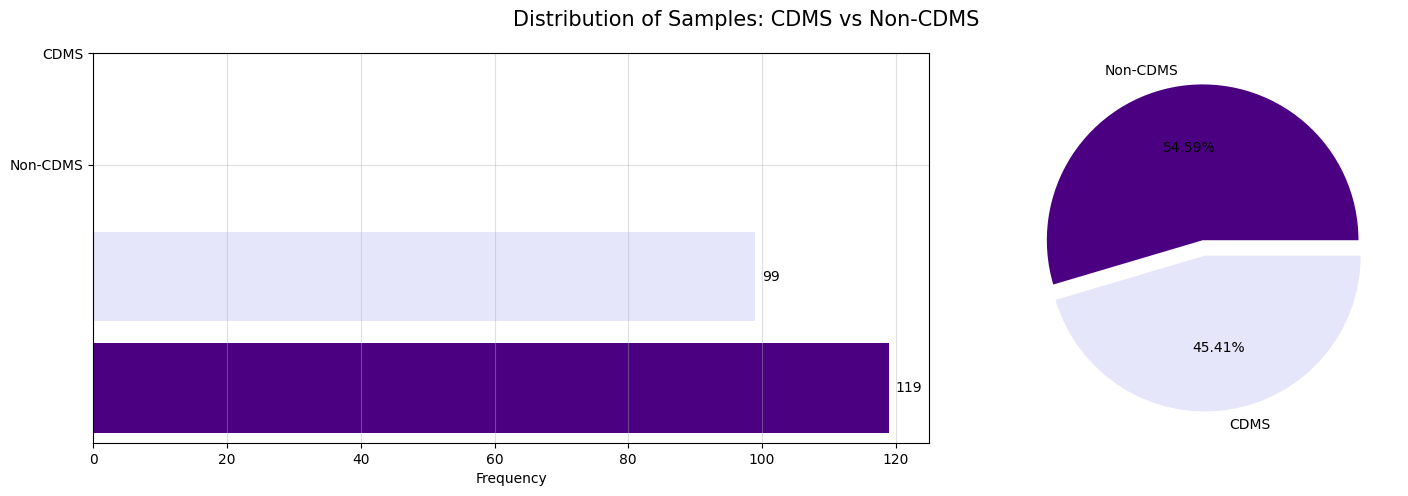

In [9]:
target = train['group'].value_counts()
colors = ['indigo','lavender']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=target.index.astype(str), width=target.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_yticks(['2','1'],['Non-CDMS','CDMS'])
axes[0].grid(alpha=0.4)

for index, values in enumerate(target):
    axes[0].text(values+1, index, str(values), va='center')
    
axes[1].pie(target.values, labels=['Non-CDMS','CDMS'], autopct='%.2f%%', explode=([0.05]*len(target.index)), colors=colors)
figure.suptitle('Distribution of Samples: CDMS vs Non-CDMS', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [10]:
from scipy.stats import mannwhitneyu

def mwutest(feature):
    # visualization
    figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
    sns.histplot(data=train, x=train[feature], hue=train['group'], palette=colors, ax=axes[0])
    axes[0].grid(alpha=0.4)
    sns.boxplot(data=train, y=train[feature], x=train['group'], palette=colors, ax=axes[1])
    #axes[1].set_xticks([0,1], ['CDMS','Non-CDMS'])
    axes[1].grid(alpha=0.4)
    figure.suptitle(f'Distribution of {feature} in CDMS vs Non-CDMS Patients', fontsize=15)
    plt.tight_layout(pad=1)
    plt.show()

    # display the summary statistics
    target = train.groupby('group')
    cdms = target.get_group('CDMS')
    non_cdms = target.get_group('Non-CDMS')
    
    cdms = cdms[~cdms[feature].isna()]
    non_cdms = non_cdms[~non_cdms[feature].isna()]
    
    display(target[feature].describe())

    # perform Mann-Whitney U test
    res = mannwhitneyu(cdms[feature], non_cdms[feature])
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'Reject null hypothesis. There is a statistically significant association between {feature} and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.')
    else:
        print(f'Failed to reject null hypothesis. Lack of evidence to concluded a statistically significant association between {feature} and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.')

In [11]:
from scipy.stats import chi2_contingency

def chi2test(feature):
    # visualization
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=train, x=train[feature], hue=train['group'], palette=colors)
    plt.title(f'Distribution of CDMS and Non-CDMS Samples by {feature}', fontsize=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.grid(alpha=0.4)
    plt.show()

    # contingency table
    contingency_table = pd.crosstab(train[feature], train['group'])
    print('Observed value: ')
    display(contingency_table)

    # perform chi-square test
    res = chi2_contingency(contingency_table)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    print('Expected value: ')
    expected_frequency = res[3]

    display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'Reject null hypothesis. There is a statistically significant association between {feature} and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.')
    else:
        print(f'Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between {feature} and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

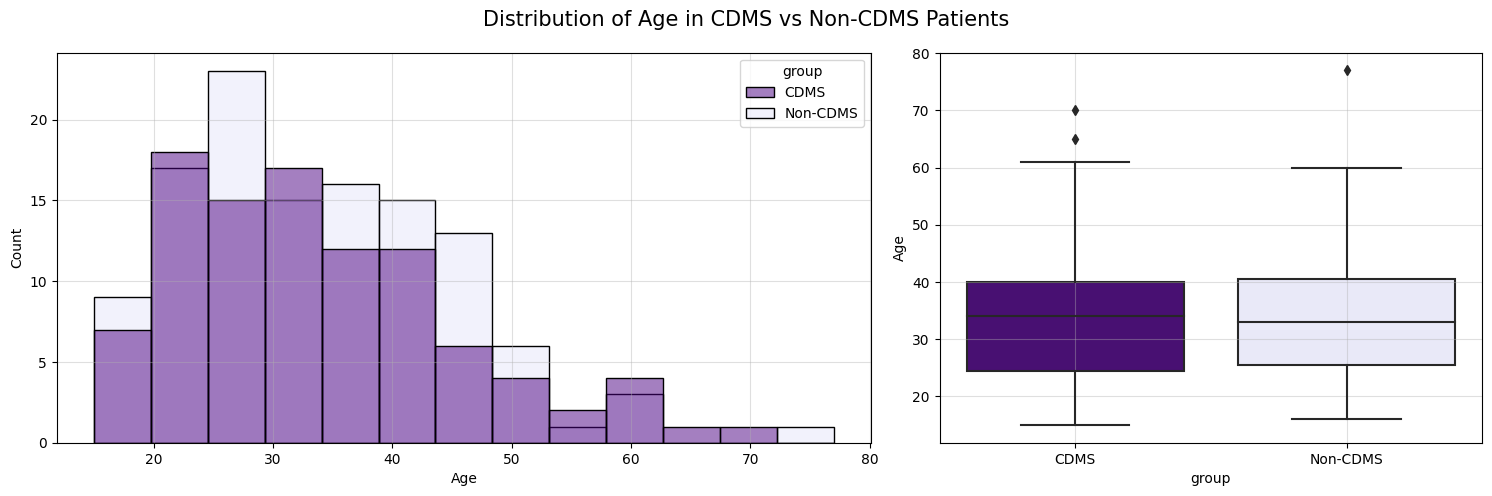

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
CDMS,99.0,34.242424,11.620786,15.0,24.5,34.0,40.0,70.0
Non-CDMS,119.0,33.957983,11.202599,16.0,25.5,33.0,40.5,77.0


Test statistic:  5877.0
Test p-value:  0.9776
Failed to reject null hypothesis. Lack of evidence to concluded a statistically significant association between Age and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [12]:
mwutest('Age')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

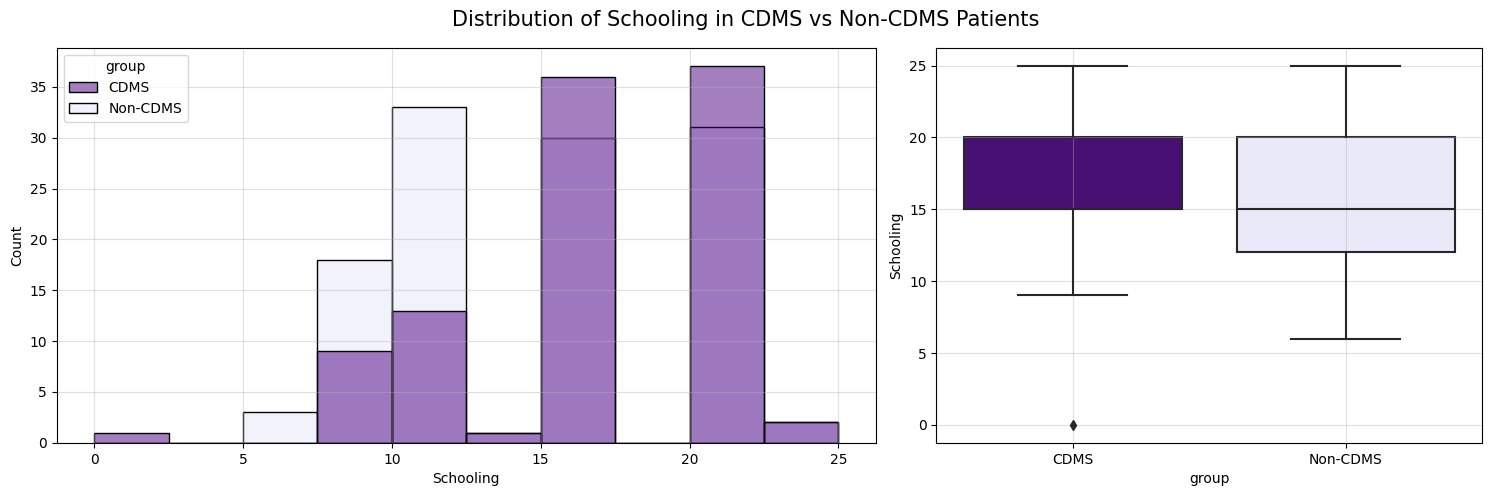

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
CDMS,99.0,15.989899,4.173519,0.0,15.0,15.0,20.0,25.0
Non-CDMS,118.0,14.491525,4.288218,6.0,12.0,15.0,20.0,25.0


Test statistic:  7139.0
Test p-value:  0.0036
Reject null hypothesis. There is a statistically significant association between Schooling and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [13]:
mwutest('Schooling')

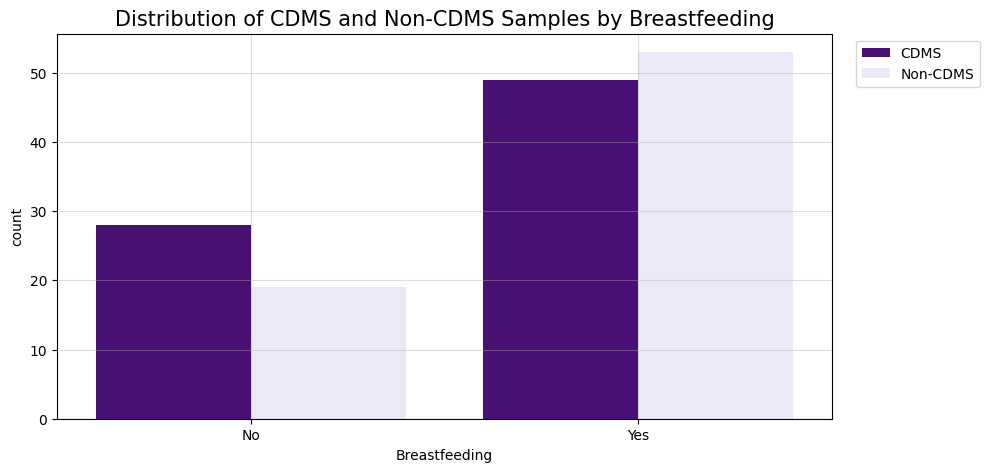

Observed value: 


group,CDMS,Non-CDMS
Breastfeeding,,
No,28,19
Yes,49,53


Expected value: 


group,CDMS,Non-CDMS
Breastfeeding,,
No,24.288591,22.711409
Yes,52.711409,49.288591


Test statistic:  1.2836
Test p-value:  0.2572
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Breastfeeding and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [14]:
chi2test('Breastfeeding')

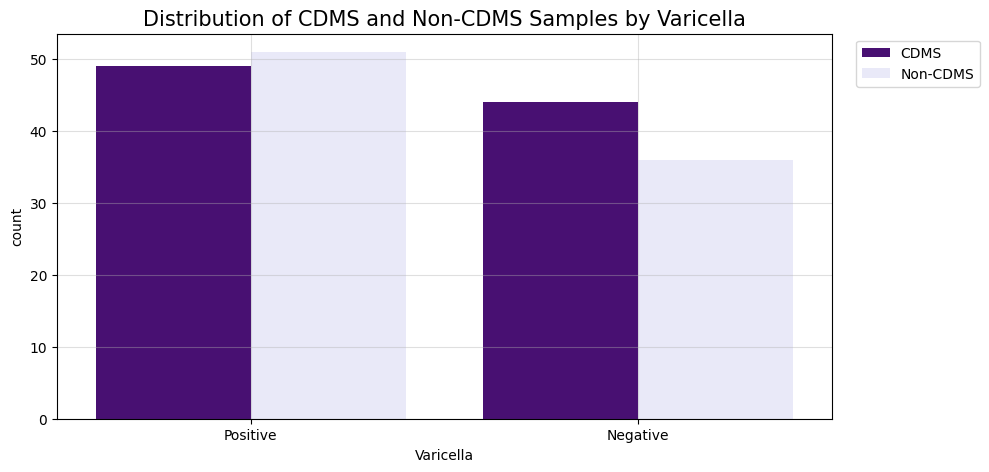

Observed value: 


group,CDMS,Non-CDMS
Varicella,,
Negative,44,36
Positive,49,51


Expected value: 


group,CDMS,Non-CDMS
Varicella,,
Negative,41.333333,38.666667
Positive,51.666667,48.333333


Test statistic:  0.423
Test p-value:  0.5155
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Varicella and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [15]:
chi2test('Varicella')

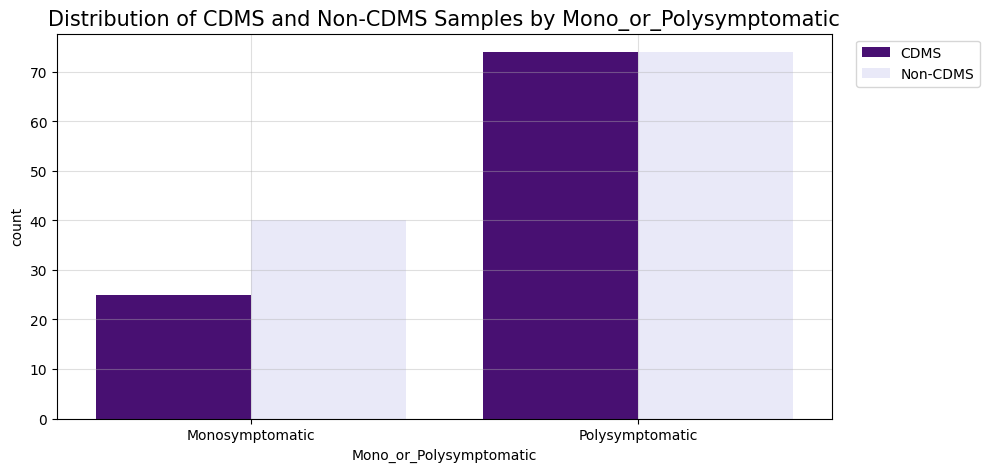

Observed value: 


group,CDMS,Non-CDMS
Mono_or_Polysymptomatic,,
Monosymptomatic,25,40
Polysymptomatic,74,74


Expected value: 


group,CDMS,Non-CDMS
Mono_or_Polysymptomatic,,
Monosymptomatic,30.211268,34.788732
Polysymptomatic,68.788732,79.211268


Test statistic:  1.9756
Test p-value:  0.1599
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Mono_or_Polysymptomatic and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [16]:
chi2test('Mono_or_Polysymptomatic')

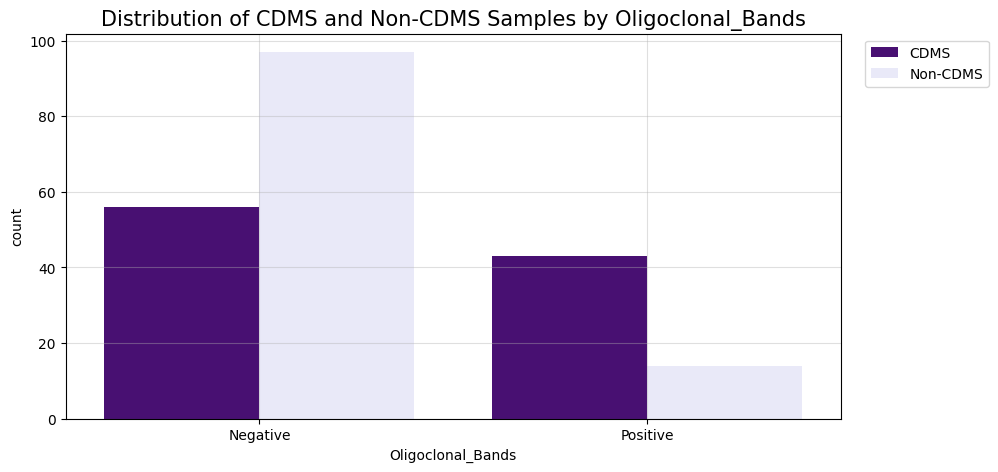

Observed value: 


group,CDMS,Non-CDMS
Oligoclonal_Bands,,
Negative,56,97
Positive,43,14


Expected value: 


group,CDMS,Non-CDMS
Oligoclonal_Bands,,
Negative,72.128571,80.871429
Positive,26.871429,30.128571


Test statistic:  23.6033
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Oligoclonal_Bands and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [17]:
chi2test('Oligoclonal_Bands')

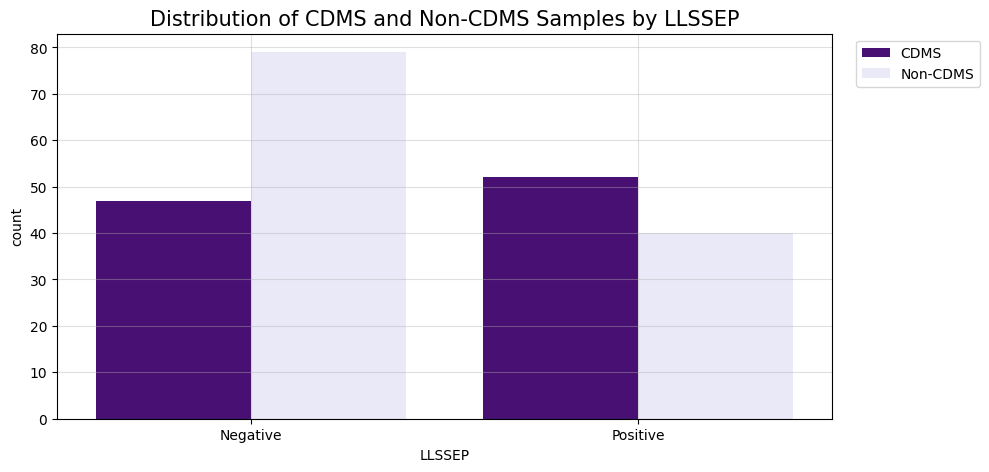

Observed value: 


group,CDMS,Non-CDMS
LLSSEP,,
Negative,47,79
Positive,52,40


Expected value: 


group,CDMS,Non-CDMS
LLSSEP,,
Negative,57.220183,68.779817
Positive,41.779817,50.220183


Test statistic:  7.1677
Test p-value:  0.0074
Reject null hypothesis. There is a statistically significant association between LLSSEP and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [18]:
chi2test('LLSSEP')

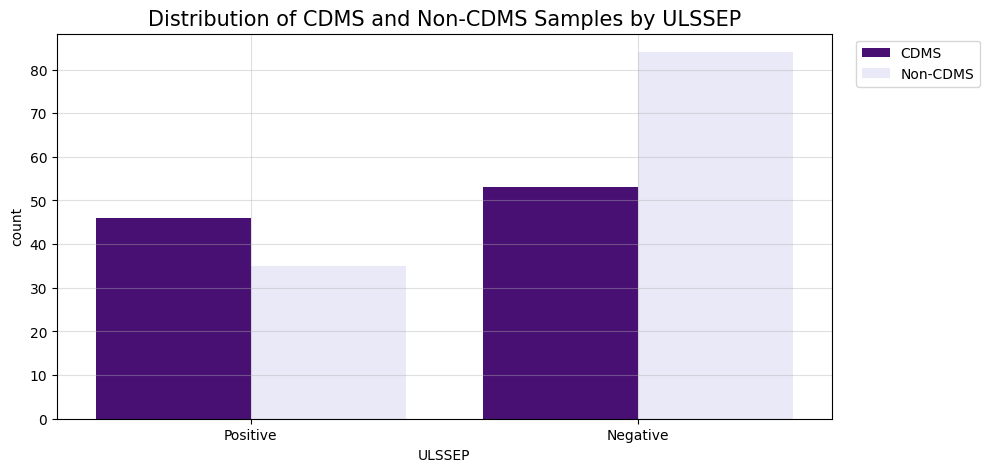

Observed value: 


group,CDMS,Non-CDMS
ULSSEP,,
Negative,53,84
Positive,46,35


Expected value: 


group,CDMS,Non-CDMS
ULSSEP,,
Negative,62.215596,74.784404
Positive,36.784404,44.215596


Test statistic:  6.0197
Test p-value:  0.0141
Reject null hypothesis. There is a statistically significant association between ULSSEP and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [19]:
chi2test('ULSSEP')

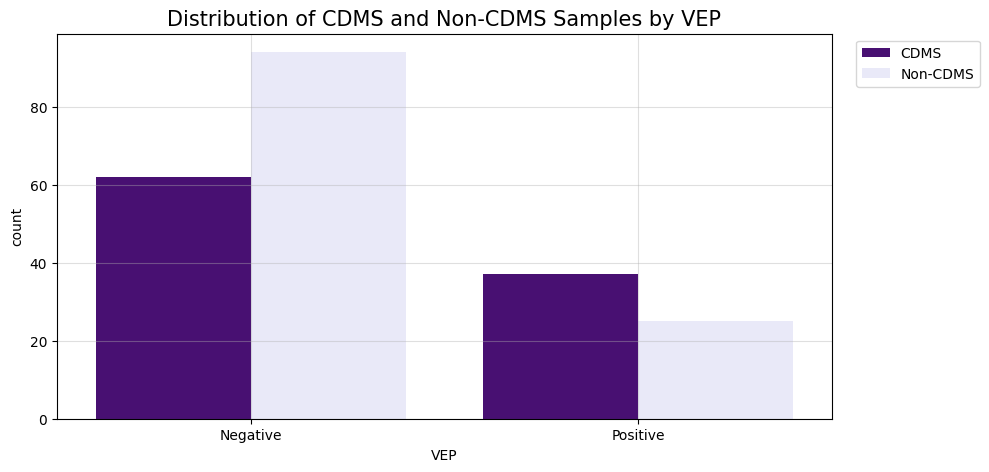

Observed value: 


group,CDMS,Non-CDMS
VEP,,
Negative,62,94
Positive,37,25


Expected value: 


group,CDMS,Non-CDMS
VEP,,
Negative,70.844037,85.155963
Positive,28.155963,33.844037


Test statistic:  6.3303
Test p-value:  0.0119
Reject null hypothesis. There is a statistically significant association between VEP and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [20]:
chi2test('VEP')

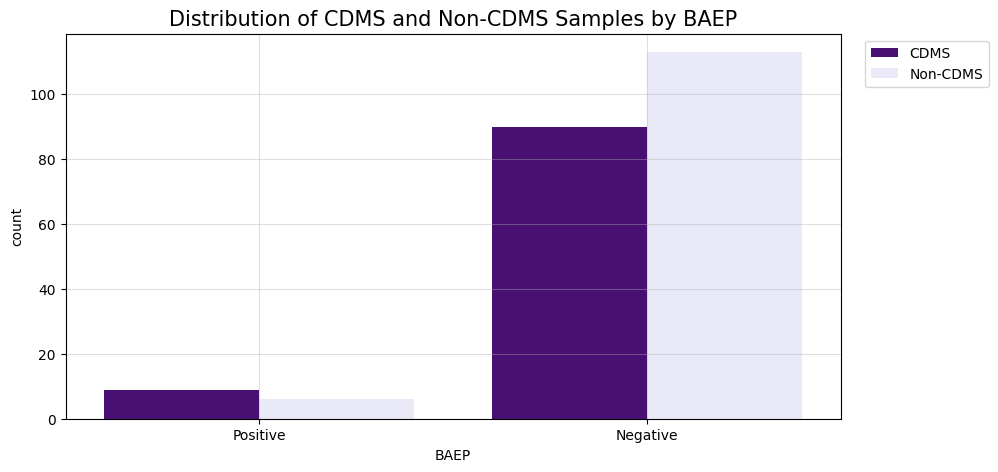

Observed value: 


group,CDMS,Non-CDMS
BAEP,,
Negative,90,113
Positive,9,6


Expected value: 


group,CDMS,Non-CDMS
BAEP,,
Negative,92.188073,110.811927
Positive,6.811927,8.188073


Test statistic:  0.823
Test p-value:  0.3643
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between BAEP and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [21]:
chi2test('BAEP')

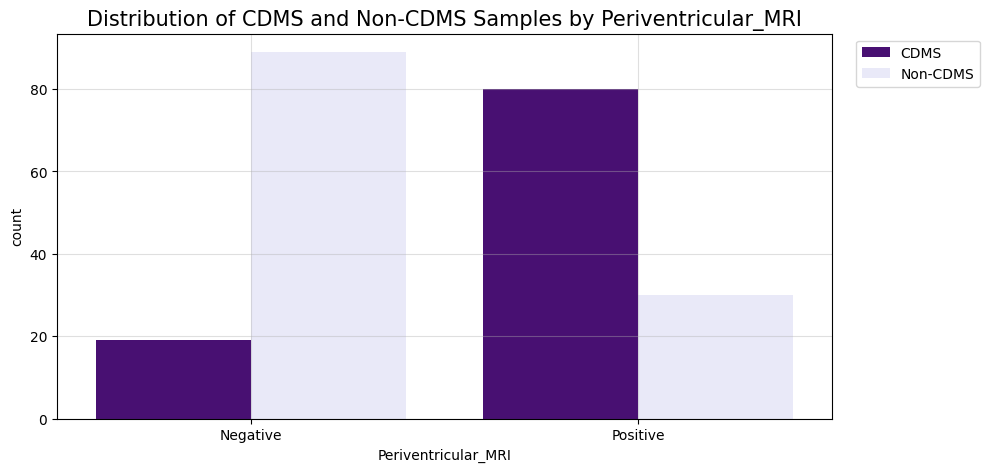

Observed value: 


group,CDMS,Non-CDMS
Periventricular_MRI,,
Negative,19,89
Positive,80,30


Expected value: 


group,CDMS,Non-CDMS
Periventricular_MRI,,
Negative,49.045872,58.954128
Positive,49.954128,60.045872


Test statistic:  64.6196
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Periventricular_MRI and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [22]:
chi2test('Periventricular_MRI')

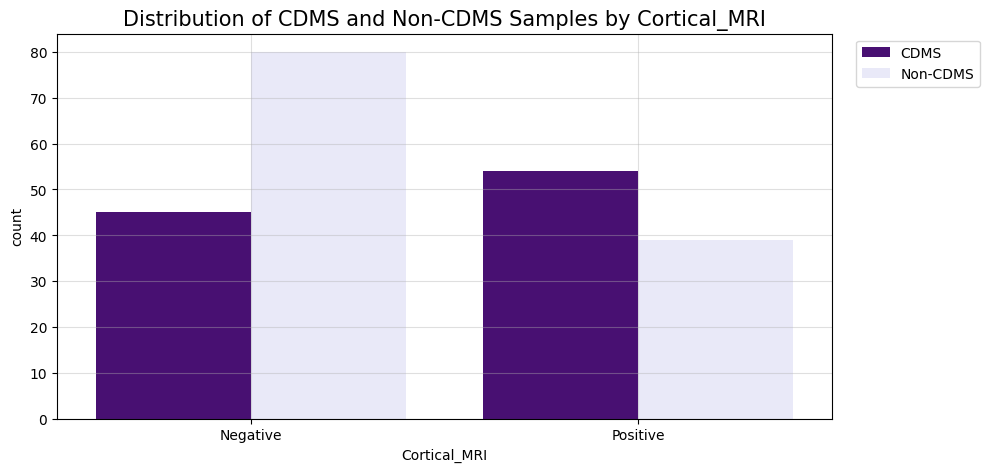

Observed value: 


group,CDMS,Non-CDMS
Cortical_MRI,,
Negative,45,80
Positive,54,39


Expected value: 


group,CDMS,Non-CDMS
Cortical_MRI,,
Negative,56.766055,68.233945
Positive,42.233945,50.766055


Test statistic:  9.6015
Test p-value:  0.0019
Reject null hypothesis. There is a statistically significant association between Cortical_MRI and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [23]:
chi2test('Cortical_MRI')

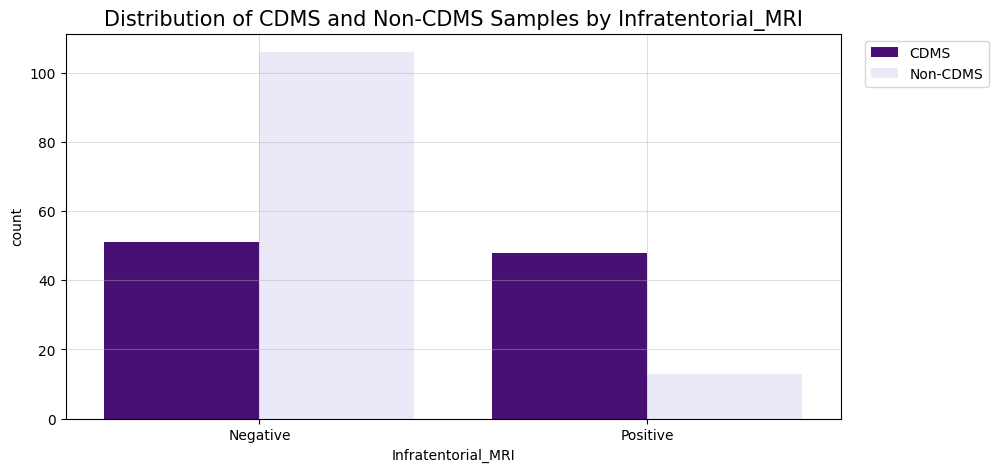

Observed value: 


group,CDMS,Non-CDMS
Infratentorial_MRI,,
Negative,51,106
Positive,48,13


Expected value: 


group,CDMS,Non-CDMS
Infratentorial_MRI,,
Negative,71.298165,85.701835
Positive,27.701835,33.298165


Test statistic:  35.9921
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Infratentorial_MRI and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [24]:
chi2test('Infratentorial_MRI')

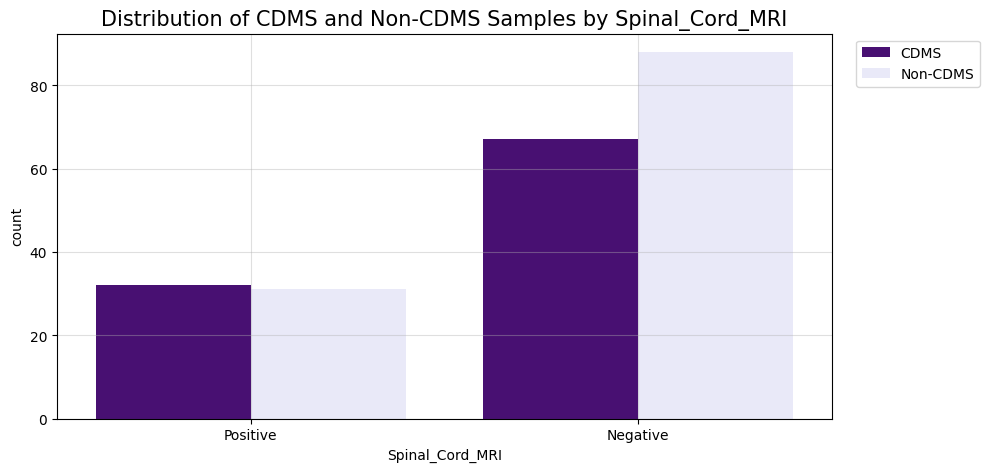

Observed value: 


group,CDMS,Non-CDMS
Spinal_Cord_MRI,,
Negative,67,88
Positive,32,31


Expected value: 


group,CDMS,Non-CDMS
Spinal_Cord_MRI,,
Negative,70.389908,84.610092
Positive,28.610092,34.389908


Test statistic:  0.7521
Test p-value:  0.3858
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Spinal_Cord_MRI and the likelihood of developing clinical definite multiple sclerosis (CDMS) in the analyzed data.


In [25]:
chi2test('Spinal_Cord_MRI')

In [26]:
Xtrain = train.drop(columns=['group'], axis=1)
ytrain = train['group']

Xtest = test.drop(columns=['group'], axis=1)
ytest = test['group']

In [28]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

categorical_features = ['Gender', 'Breastfeeding', 'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic', 
                        'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
                        'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS']

numeric_features = ['Age', 'Schooling']




def categorical_transformer_fn(data):
    
    imputer = SimpleImputer(strategy='most_frequent')
    data_imputed = imputer.fit_transform(data)
    encoder = OneHotEncoder(handle_unknown='ignore')
    return encoder.fit_transform(data_imputed)


def numeric_transformer_fn(data):
    
    imputer = KNNImputer(n_neighbors=2)
    data_imputed = imputer.fit_transform(data)
    scaler = MinMaxScaler()
    return scaler.fit_transform(data_imputed)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', FunctionTransformer(categorical_transformer_fn, validate=False), categorical_features),
        ('num', FunctionTransformer(numeric_transformer_fn, validate=False), numeric_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])




In [30]:
Xtrain_transformed = pipeline.fit_transform(Xtrain)
Xtest_transformed = pipeline.transform(Xtest)


In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [42]:

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


classifiers = {
    "Logistic Regression": LogisticRegression(random_state=122, max_iter=5000),
    "Random Forest": RandomForestClassifier(random_state=122),
    "Naive Bayes": MultinomialNB(),
    "KNeighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "MLP Neural Network": MLPClassifier(random_state=122)
}


param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [2, 4]
    },
    "Logistic Regression": {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': ['sqrt', 'log2']
    },
    "Naive Bayes": {},  
    "KNeighbors": {
        'n_neighbors': np.arange(1, 21),  
        'p': [1, 2]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 1],
        'degree': [2, 3, 4]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 1, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "Gaussian Naive Bayes": {},  
    "Ridge Classifier": {
        'alpha': [0.1, 1, 10, 100]
    },
    "Bagging Classifier": {
        'n_estimators': [50, 100, 200],
        'max_samples': [0.5, 0.7, 1.0]
    },
    "Extra Trees Classifier": {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [2, 4]
    },
    "MLP Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
}


best_models = {}
for model_name, model in classifiers.items():
    print(f"\nModel {model_name} | {model.__class__.__name__}")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(Xtrain_transformed, ytrain_encoded)
    
    best_models[model_name] = grid_search.best_estimator_
    
    print('Best Parameters: ', grid_search.best_params_)
    print('Best Accuracy: ', grid_search.best_score_)





Model Logistic Regression | LogisticRegression
Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy:  0.8580338266384777

Model Random Forest | RandomForestClassifier
Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy:  0.7941860465116279

Model Naive Bayes | MultinomialNB
Best Parameters:  {}
Best Accuracy:  0.7890063424947147

Model KNeighbors | KNeighborsClassifier
Best Parameters:  {'n_neighbors': 5, 'p': 2}
Best Accuracy:  0.7849894291754758

Model AdaBoost | AdaBoostClassifier
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 200}
Best Accuracy:  0.8169133192389006

Model Gradient Boosting | GradientBoostingClassifier
Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Accuracy:  0.8350951374207188

Model XGBoost | XGBClassifier
Best Parameters:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 1

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'solver': 'adam'}
Best Accuracy:  0.8258985200845664


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


categorical_features = ['Gender', 'Breastfeeding', 'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic', 
                        'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
                        'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS']

numeric_features = ['Age', 'Schooling']


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler())
])


Xtrain_transformed = pipeline.fit_transform(Xtrain)  


Xtest_transformed = pipeline.transform(Xtest) 


print(f"Number of features in training set: {Xtrain_transformed.shape[1]}")
print(f"Number of features in test set: {Xtest_transformed.shape[1]}")


tree = DecisionTreeClassifier(random_state=122)
tree.fit(Xtrain_transformed, ytrain_encoded)  
y_pred_tree = tree.predict(Xtest_transformed)

from sklearn.metrics import accuracy_score
print(f"Decision Tree Accuracy: {accuracy_score(ytest_encoded, y_pred_tree)}")


Number of features in training set: 49
Number of features in test set: 49
Decision Tree Accuracy: 0.7818181818181819


In [38]:
from sklearn.svm import SVC


svc = SVC(random_state=122, probability=True)  


svc.fit(Xtrain_transformed, ytrain_encoded)


y_pred_svc = svc.predict(Xtest_transformed)
y_prob_svc = svc.predict_proba(Xtest_transformed)[:, 1] 

# Calculate various metrics and plot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(ytest_encoded, y_pred_svc)
precision = precision_score(ytest_encoded, y_pred_svc)
recall = recall_score(ytest_encoded, y_pred_svc)
f1 = f1_score(ytest_encoded, y_pred_svc)
roc_auc = roc_auc_score(ytest_encoded, y_prob_svc)
conf_matrix = confusion_matrix(ytest_encoded, y_pred_svc)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8181818181818182
Precision: 0.8275862068965517
Recall: 0.8275862068965517
F1 Score: 0.8275862068965517
ROC AUC Score: 0.8819628647214853
Confusion Matrix:
[[21  5]
 [ 5 24]]


Ridge
Accuracy: 0.7636363636363637
Precision: 0.7666666666666667
Recall: 0.7931034482758621
F1 Score: 0.7796610169491527
ROC AUC Score: 0.7619363395225465
Confusion Matrix:
[[19  7]
 [ 6 23]]

Model: Logistic Regression
Accuracy: 0.8363636363636363
Precision: 0.8571428571428571
Recall: 0.8275862068965517
F1-Score: 0.8421052631578947
ROC-AUC: 0.909814323607427
Log Loss: 0.5055948316259614


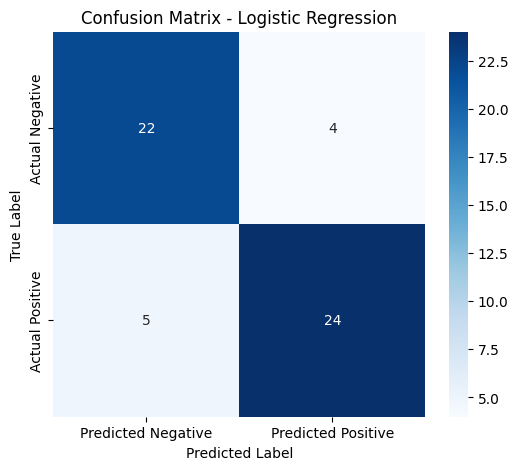


Model: Random Forest
Accuracy: 0.8181818181818182
Precision: 0.8275862068965517
Recall: 0.8275862068965517
F1-Score: 0.8275862068965517
ROC-AUC: 0.8885941644562334
Log Loss: 0.42824548737135465


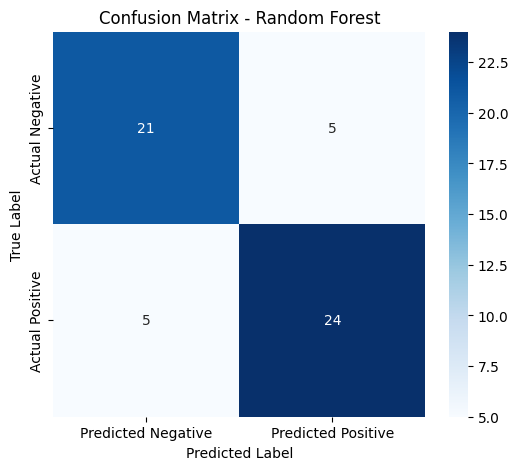


Model: Naive Bayes
Accuracy: 0.7818181818181819
Precision: 0.7741935483870968
Recall: 0.8275862068965517
F1-Score: 0.7999999999999999
ROC-AUC: 0.8740053050397878
Log Loss: 0.7010119611418218


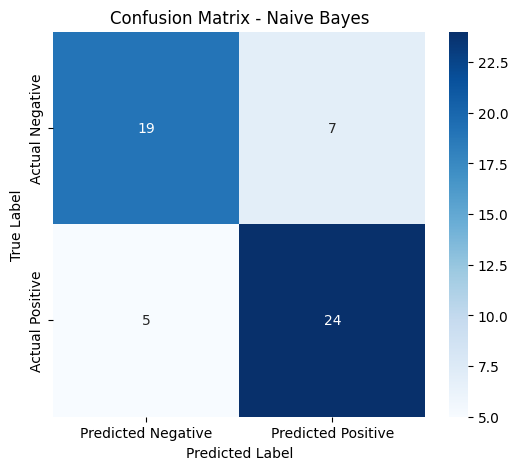


Model: KNeighbors
Accuracy: 0.7454545454545455
Precision: 0.7142857142857143
Recall: 0.8620689655172413
F1-Score: 0.7812500000000001
ROC-AUC: 0.8388594164456232
Log Loss: 2.2974687306361004


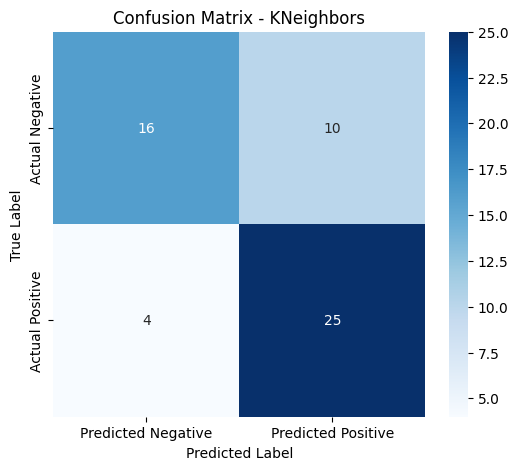


Model: AdaBoost
Accuracy: 0.7818181818181819
Precision: 0.7741935483870968
Recall: 0.8275862068965517
F1-Score: 0.7999999999999999
ROC-AUC: 0.8647214854111407
Log Loss: 0.6236902274072165


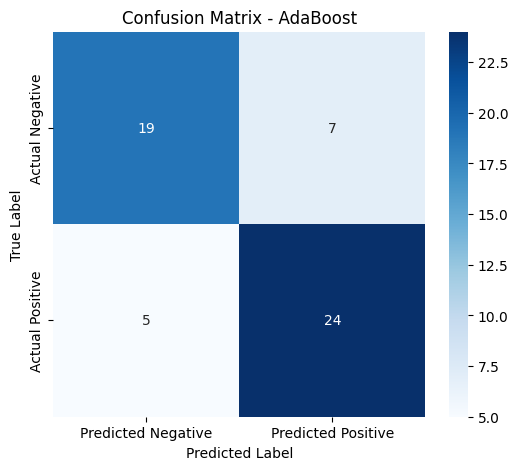


Model: Gradient Boosting
Accuracy: 0.7636363636363637
Precision: 0.7666666666666667
Recall: 0.7931034482758621
F1-Score: 0.7796610169491527
ROC-AUC: 0.8806366047745359
Log Loss: 0.4444257690213488


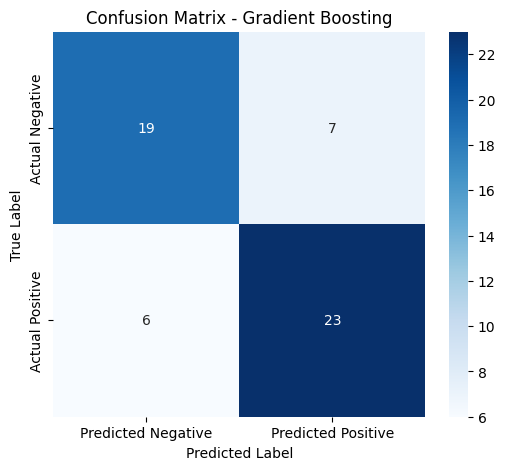


Model: XGBoost
Accuracy: 0.8
Precision: 0.8214285714285714
Recall: 0.7931034482758621
F1-Score: 0.8070175438596492
ROC-AUC: 0.8912466843501327
Log Loss: 0.56037489403337


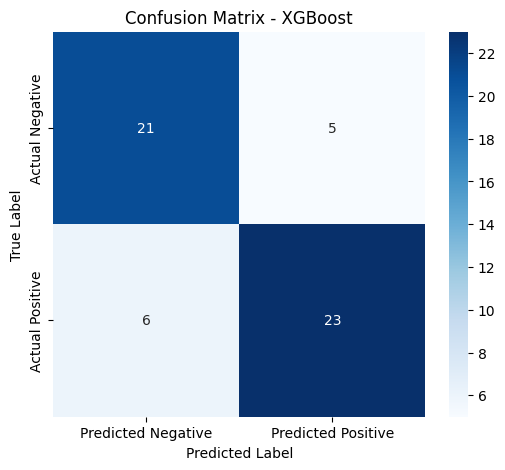


Model: Gaussian Naive Bayes
Accuracy: 0.6363636363636364
Precision: 0.6
Recall: 0.9310344827586207
F1-Score: 0.7297297297297297
ROC-AUC: 0.6618037135278514
Log Loss: 11.718765157444645


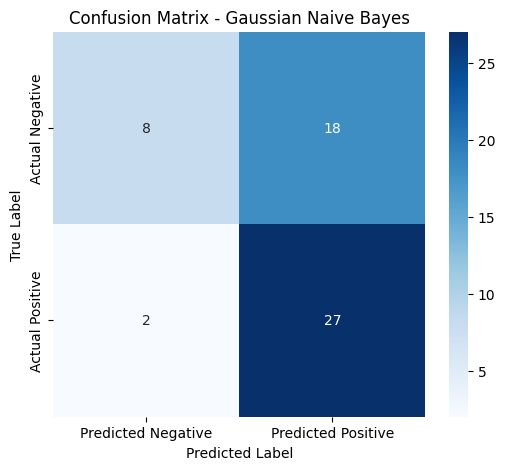


Model: Bagging Classifier
Accuracy: 0.7818181818181819
Precision: 0.7931034482758621
Recall: 0.7931034482758621
F1-Score: 0.7931034482758621
ROC-AUC: 0.8885941644562335
Log Loss: 0.4397132252699296


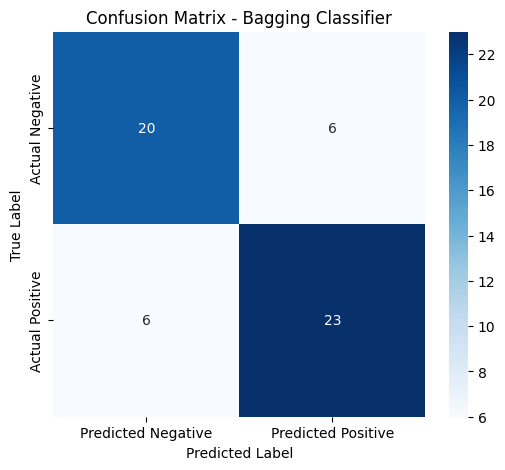


Model: Extra Trees Classifier
Accuracy: 0.7818181818181819
Precision: 0.7931034482758621
Recall: 0.7931034482758621
F1-Score: 0.7931034482758621
ROC-AUC: 0.8846153846153847
Log Loss: 0.4142418885942301


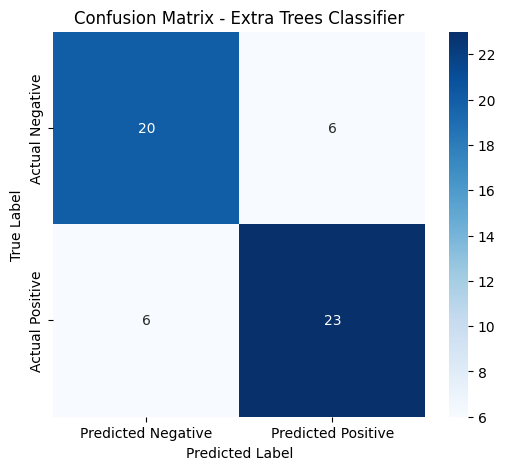


Model: MLP Neural Network
Accuracy: 0.7454545454545455
Precision: 0.7419354838709677
Recall: 0.7931034482758621
F1-Score: 0.7666666666666667
ROC-AUC: 0.8806366047745359
Log Loss: 1.0861661390876391


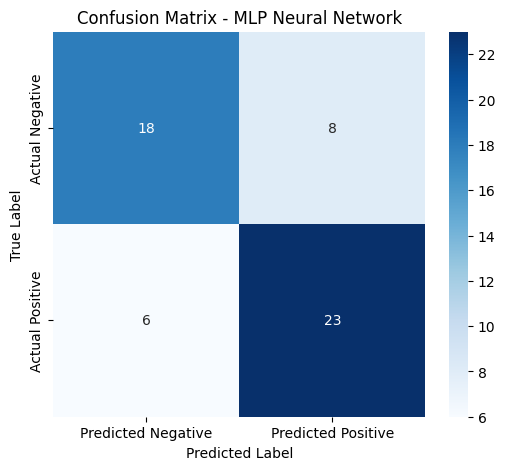

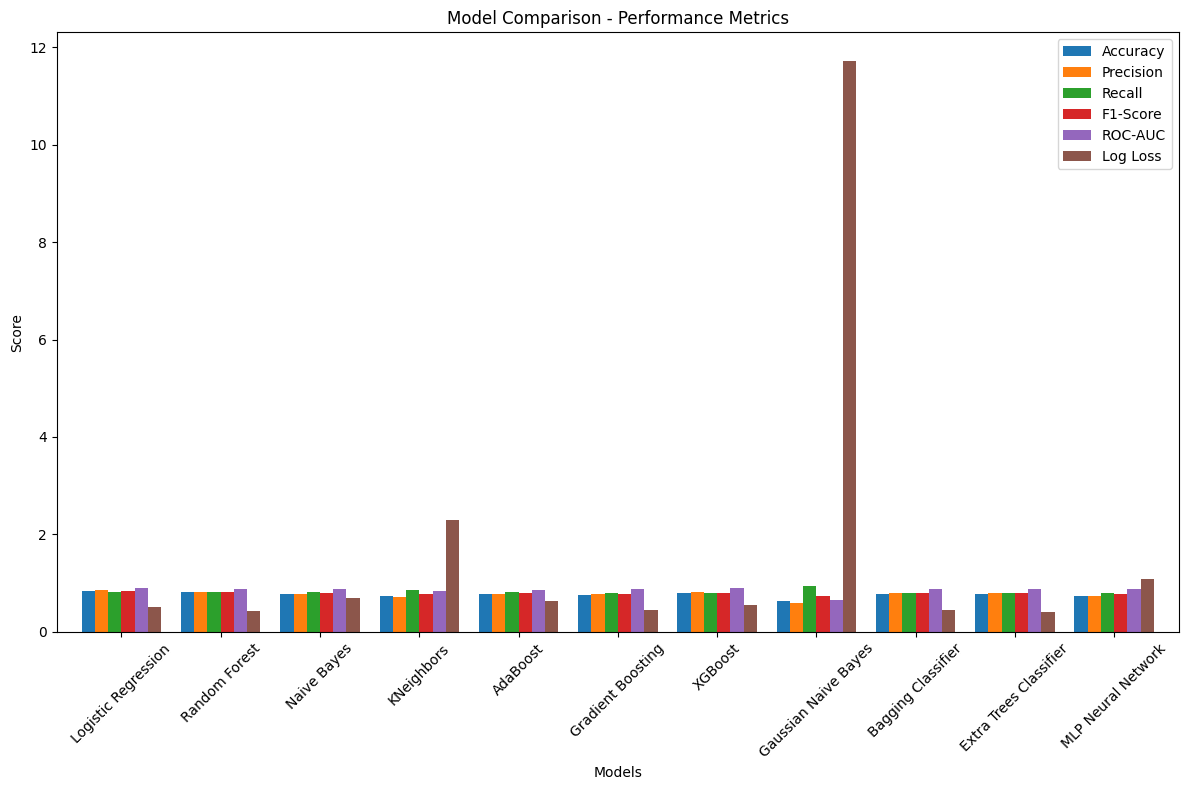

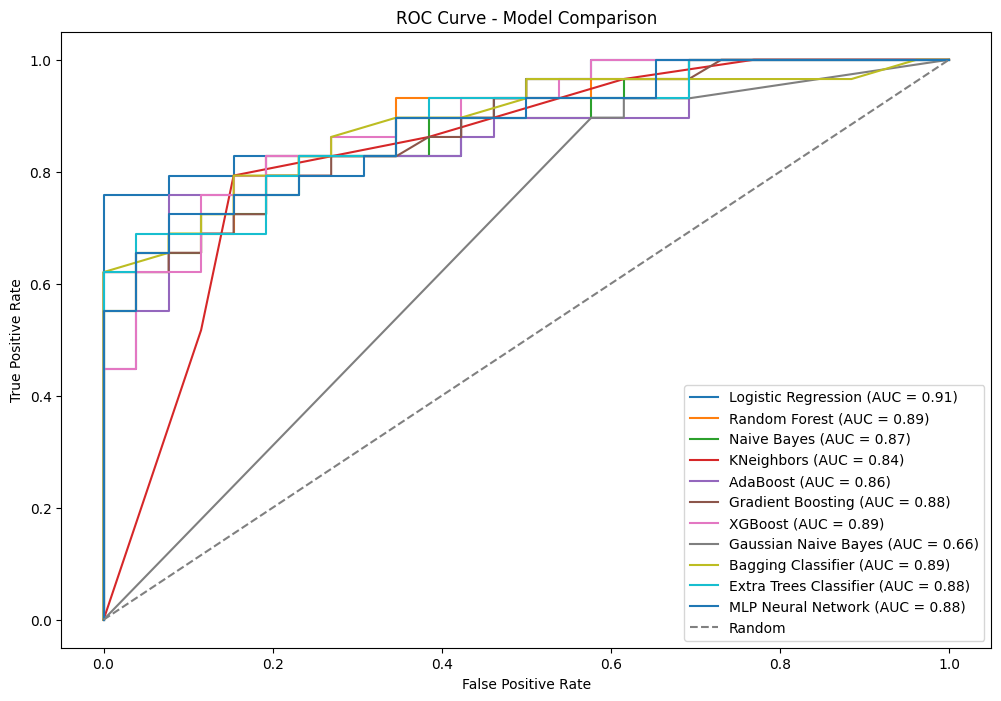

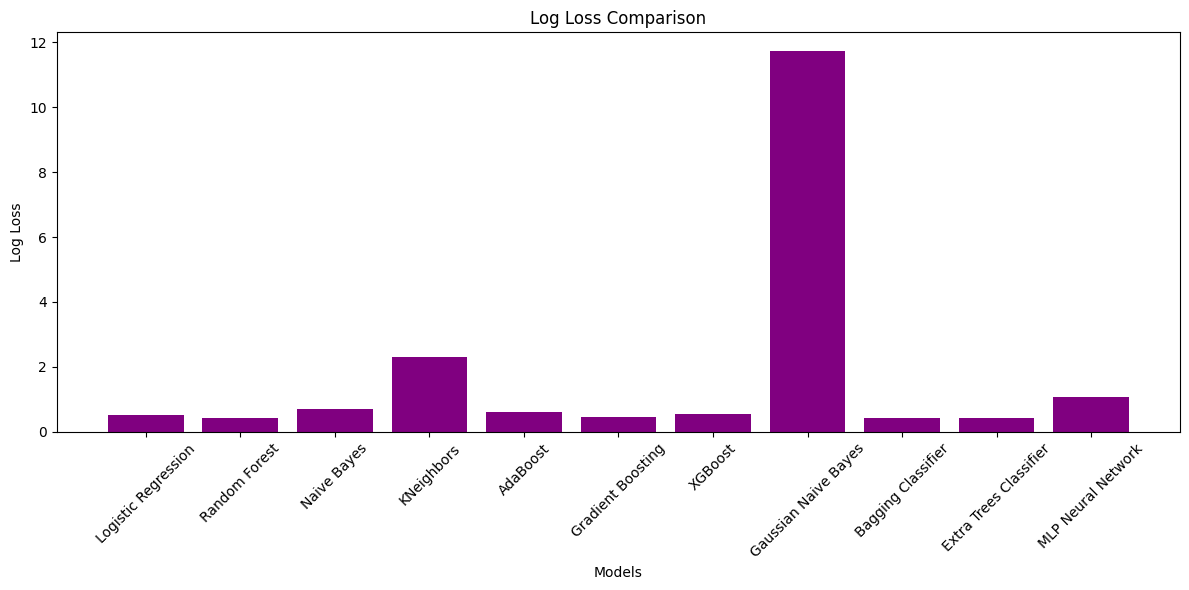

In [45]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
# Create the Ridge Classifier
ridge = RidgeClassifier()

# Fit the model
ridge.fit(Xtrain_transformed, ytrain_encoded)

# Make predictions
y_pred_ridge = ridge.predict(Xtest_transformed)

# Calculate various metric
print("Ridge")
accuracy = accuracy_score(ytest_encoded, y_pred_ridge)
precision = precision_score(ytest_encoded, y_pred_ridge)
recall = recall_score(ytest_encoded, y_pred_ridge)
f1 = f1_score(ytest_encoded, y_pred_ridge)
roc_auc = roc_auc_score(ytest_encoded, y_pred_ridge)  # Only works if labels are binary
conf_matrix = confusion_matrix(ytest_encoded, y_pred_ridge)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix


evaluation_results = {}


for model_name, model in best_models.items():
    
    y_pred = model.predict(Xtest_transformed) 
    y_prob = model.predict_proba(Xtest_transformed)[:, 1]  
    
    # Calculate various metrics
    accuracy = accuracy_score(ytest_encoded, y_pred) 
    precision = precision_score(ytest_encoded, y_pred)
    recall = recall_score(ytest_encoded, y_pred)
    f1 = f1_score(ytest_encoded, y_pred)
    roc_auc = roc_auc_score(ytest_encoded, y_prob)
    logloss = log_loss(ytest_encoded, y_prob)
    
    
    cm = confusion_matrix(ytest_encoded, y_pred)
    
    
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Log Loss': logloss,
        'Confusion Matrix': cm
    }

    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Log Loss: {logloss}")
    
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


import pandas as pd
metrics_df = pd.DataFrame(evaluation_results).T


metrics_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title("Model Comparison - Performance Metrics")
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for model_name, model in best_models.items():
    y_prob = model.predict_proba(Xtest_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(ytest_encoded, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(ytest_encoded, y_prob):.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title("ROC Curve - Model Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


log_loss_values = [evaluation_results[model_name]['Log Loss'] for model_name in best_models]
plt.figure(figsize=(12, 6))
plt.bar(best_models.keys(), log_loss_values, color='purple')
plt.title("Log Loss Comparison")
plt.xlabel("Models")
plt.ylabel("Log Loss")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
